# Movie Analysis
---

In [1]:
#import lib
import pandas as pd 

Loading the data

In [2]:
data =pd.read_json('movies_dataset.json')

In [3]:
data.head()

,color,director_name,num_critic_for_reviews,duration,gross,genres,star_name,movie_title,movie_imdb_link,language,country,budget,title_year,imdb_score
0,Color,James Cameron,723.0,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,237000000.0,2009.0,7.9
1,Color,Gore Verbinski,302.0,169.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,300000000.0,2007.0,7.1
2,Color,Sam Mendes,602.0,148.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,English,UK,245000000.0,2015.0,6.8
3,Color,Christopher Nolan,813.0,164.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,English,USA,250000000.0,2012.0,8.5
4,NaN,Doug Walker,NaN,NaN,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,7.1


Check the dataframe shape (#rows and #columns)

In [4]:
data.shape

(5043, 14)

Let's check the data types of the columns

In [5]:
data.dtypes

color                      object
director_name              object
num_critic_for_reviews    float64
duration                  float64
gross                     float64
genres                     object
star_name                  object
movie_title                object
movie_imdb_link            object
language                   object
country                    object
budget                    float64
title_year                float64
imdb_score                float64
dtype: object

Column Selection

In [6]:
data.color

0       Color
1       Color
2       Color
3       Color
4         NaN
        ...  
5038    Color
5039    Color
5040    Color
5041    Color
5042    Color
Name: color, Length: 5043, dtype: object

---

## Data Preparation
Remove some columns:    
   
   - `movie_imdb_link`
   - `num_critic_for_reviews`
   - `genre`

In [7]:
data.drop(axis = 1, columns =['movie_imdb_link', 'num_critic_for_reviews', 'genres'], inplace = True)
data.head()

,color,director_name,duration,gross,star_name,movie_title,language,country,budget,title_year,imdb_score
0,Color,James Cameron,178.0,760505847.0,CCH Pounder,Avatar,English,USA,237000000.0,2009.0,7.9
1,Color,Gore Verbinski,169.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,English,USA,300000000.0,2007.0,7.1
2,Color,Sam Mendes,148.0,200074175.0,Christoph Waltz,Spectre,English,UK,245000000.0,2015.0,6.8
3,Color,Christopher Nolan,164.0,448130642.0,Tom Hardy,The Dark Knight Rises,English,USA,250000000.0,2012.0,8.5
4,NaN,Doug Walker,NaN,NaN,Doug Walker,Star Wars: Episode VII - The Force Awakens,NaN,NaN,NaN,NaN,7.1


Let's check the shape again

In [8]:
data.shape

(5043, 11)

Let's convert the dtype of `title_year` column to integer

In [9]:
data.title_year = data.title_year.astype('Int64')
data.head()

,color,director_name,duration,gross,star_name,movie_title,language,country,budget,title_year,imdb_score
0,Color,James Cameron,178.0,760505847.0,CCH Pounder,Avatar,English,USA,237000000.0,2009,7.9
1,Color,Gore Verbinski,169.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,English,USA,300000000.0,2007,7.1
2,Color,Sam Mendes,148.0,200074175.0,Christoph Waltz,Spectre,English,UK,245000000.0,2015,6.8
3,Color,Christopher Nolan,164.0,448130642.0,Tom Hardy,The Dark Knight Rises,English,USA,250000000.0,2012,8.5
4,NaN,Doug Walker,NaN,NaN,Doug Walker,Star Wars: Episode VII - The Force Awakens,NaN,NaN,NaN,<NA>,7.1


Renaming some columns: 
- changing `gross` to `movie_income`
- changing `budget` to `movie_budget`
- changing `lanuage` to `Language`

In [10]:
rename_dict= {'gross': 'movie_income',
              'budget' : 'movie_budget',
              'language': 'Language'}
data.rename(columns= rename_dict, inplace= True)
data.head()

,color,director_name,duration,movie_income,star_name,movie_title,Language,country,movie_budget,title_year,imdb_score
0,Color,James Cameron,178.0,760505847.0,CCH Pounder,Avatar,English,USA,237000000.0,2009,7.9
1,Color,Gore Verbinski,169.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,English,USA,300000000.0,2007,7.1
2,Color,Sam Mendes,148.0,200074175.0,Christoph Waltz,Spectre,English,UK,245000000.0,2015,6.8
3,Color,Christopher Nolan,164.0,448130642.0,Tom Hardy,The Dark Knight Rises,English,USA,250000000.0,2012,8.5
4,NaN,Doug Walker,NaN,NaN,Doug Walker,Star Wars: Episode VII - The Force Awakens,NaN,NaN,NaN,<NA>,7.1


---
### Data Analysis 


Let's checkout the distribution of `duration` column using a histogram.


In [11]:
data.head()

,color,director_name,duration,movie_income,star_name,movie_title,Language,country,movie_budget,title_year,imdb_score
0,Color,James Cameron,178.0,760505847.0,CCH Pounder,Avatar,English,USA,237000000.0,2009,7.9
1,Color,Gore Verbinski,169.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,English,USA,300000000.0,2007,7.1
2,Color,Sam Mendes,148.0,200074175.0,Christoph Waltz,Spectre,English,UK,245000000.0,2015,6.8
3,Color,Christopher Nolan,164.0,448130642.0,Tom Hardy,The Dark Knight Rises,English,USA,250000000.0,2012,8.5
4,NaN,Doug Walker,NaN,NaN,Doug Walker,Star Wars: Episode VII - The Force Awakens,NaN,NaN,NaN,<NA>,7.1


Text(0.5, 1.0, 'Movie Duration Distribution')

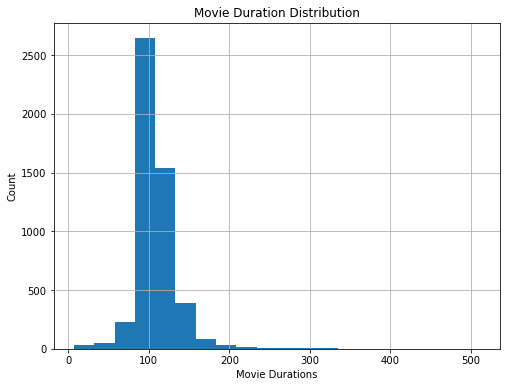

In [12]:
ax = data.duration.hist(bins= 20, figsize=(8, 6))
ax.set_xlabel('Movie Durations')
ax.set_ylabel('Count')
ax.set_title("Movie Duration Distribution")

As we can see, most of the movie have duration form 60 to 120 minutes.

The distribution of `imdb_score` column

Text(0.5, 1.0, 'Movie Score Distribution')

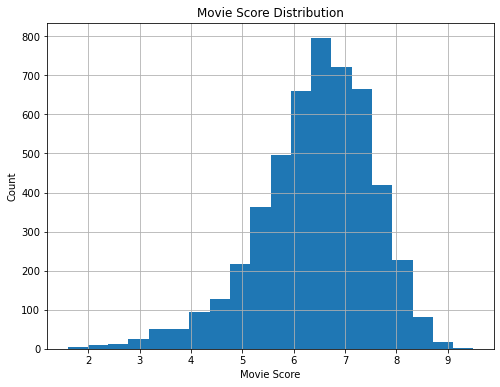

In [13]:
ax = data.imdb_score.hist(bins= 20, figsize=(8, 6))
ax.set_xlabel('Movie Score')
ax.set_ylabel('Count')
ax.set_title("Movie Score Distribution")

Most of the movie has score in range from 5 to 8.
There a small amount of movie has score less than 2 and 10. 

Let's check how many movies have the `imdb_score` less than `4`.

In [14]:
low_score_movies= data[data.imdb_score<4]
low_score_movies

,color,director_name,duration,movie_income,star_name,movie_title,Language,country,movie_budget,title_year,imdb_score
217,Color,Joel Schumacher,125.0,107285004.0,Michael Gough,Batman & Robin,English,USA,125000000.0,1997,3.7
267,Color,Jan de Bont,121.0,48068396.0,Jason Patric,Speed 2: Cruise Control,English,USA,160000000.0,1997,3.7
273,Color,Bo Welch,82.0,100446895.0,Sean Hayes,The Cat in the Hat,English,USA,109000000.0,2003,3.8
313,Color,Pitof,87.0,40198710.0,Frances Conroy,Catwoman,English,USA,100000000.0,2004,3.3
319,Color,Lawrence Guterman,94.0,17010646.0,Jamie Kennedy,Son of the Mask,English,USA,84000000.0,2005,2.2
...,...,...,...,...,...,...,...,...,...,...,...
4988,Color,Terron R. Parsons,93.0,NaN,Richard Tyson,Hayride,English,USA,60000.0,2012,3.4
5000,Color,Travis Legge,83.0,NaN,Elissa Dowling,Raymond Did It,English,USA,40000.0,2011,3.2
5002,Color,Collin Joseph Neal,75.0,NaN,Julianne Gabert,"Run, Hide, Die",English,USA,50000.0,2012,3.7
5017,Color,Travis Legge,90.0,NaN,Kristen Seavey,Dry Spell,English,USA,22000.0,2013,3.3


In [15]:
low_score_movies.shape

(156, 11)

There are total 156 movies have imdb score less than 4

In [16]:
data_usa= data[data.country == "USA"]

Text(0.5, 1.0, 'Movie Score in USA Distribution')

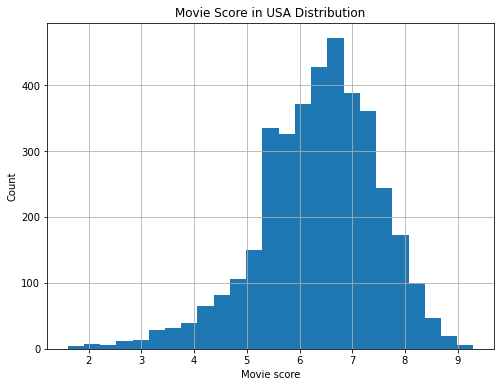

In [17]:
ax = data_usa.imdb_score.hist(bins= 25, figsize=(8, 6))
ax.set_xlabel('Movie score')
ax.set_ylabel('Count')
ax.set_title("Movie Score in USA Distribution")

---
### Let's answer to some analytical questions 
    
Question 1 - In which year we have the `highest` and `lowest` number of movies?

Now finding out number of movies per year

In [18]:
data.head()

,color,director_name,duration,movie_income,star_name,movie_title,Language,country,movie_budget,title_year,imdb_score
0,Color,James Cameron,178.0,760505847.0,CCH Pounder,Avatar,English,USA,237000000.0,2009,7.9
1,Color,Gore Verbinski,169.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,English,USA,300000000.0,2007,7.1
2,Color,Sam Mendes,148.0,200074175.0,Christoph Waltz,Spectre,English,UK,245000000.0,2015,6.8
3,Color,Christopher Nolan,164.0,448130642.0,Tom Hardy,The Dark Knight Rises,English,USA,250000000.0,2012,8.5
4,NaN,Doug Walker,NaN,NaN,Doug Walker,Star Wars: Episode VII - The Force Awakens,NaN,NaN,NaN,<NA>,7.1


In [19]:
count_per_year= data.groupby('title_year').size()

In [25]:
print(f'The year have highest number of movie is : {count_per_year.idxmax()} and the number of movie is : {count_per_year.max()}')
print(f'The year have lowest number of movie is : {count_per_year.idxmin()} and the number of movie is : {count_per_year.min()}')

The year have highest number of movie is : 2009 and the number of movie is : 260
The year have lowest number of movie is : 1916 and the number of movie is : 1


Let's create a line chart to show the result

Text(0, 0.5, 'No of Movie')

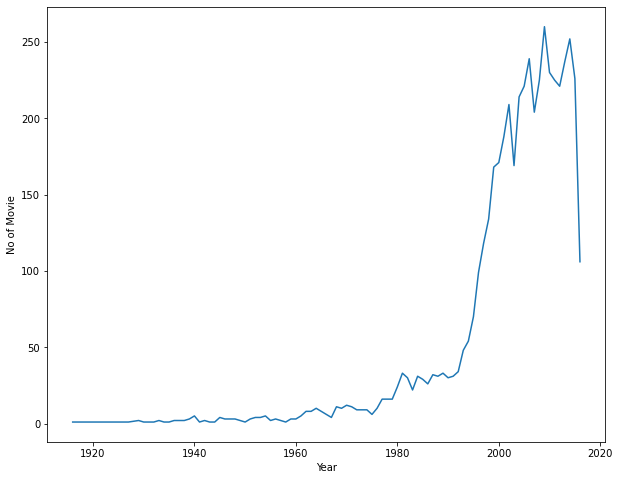

In [28]:
ax = count_per_year.plot(figsize = (10, 8))
ax.set_xlabel('Year')
ax.set_ylabel('No of Movie')

Question 2 - In which year we have `minimum` and `maximum` average `imdb_score` ? 

Finding average imdb score per year 

In [30]:
avg_score= data.groupby('title_year')['imdb_score'].mean()
avg_score

title_year
1916    8.000000
1920    4.800000
1925    8.300000
1927    8.300000
1929    7.150000
          ...   
2012    6.266516
2013    6.369620
2014    6.228175
2015    6.033628
2016    6.399057
Name: imdb_score, Length: 91, dtype: float64

Let's Use a barchart to visualize the result

Text(0.5, 0, 'year')

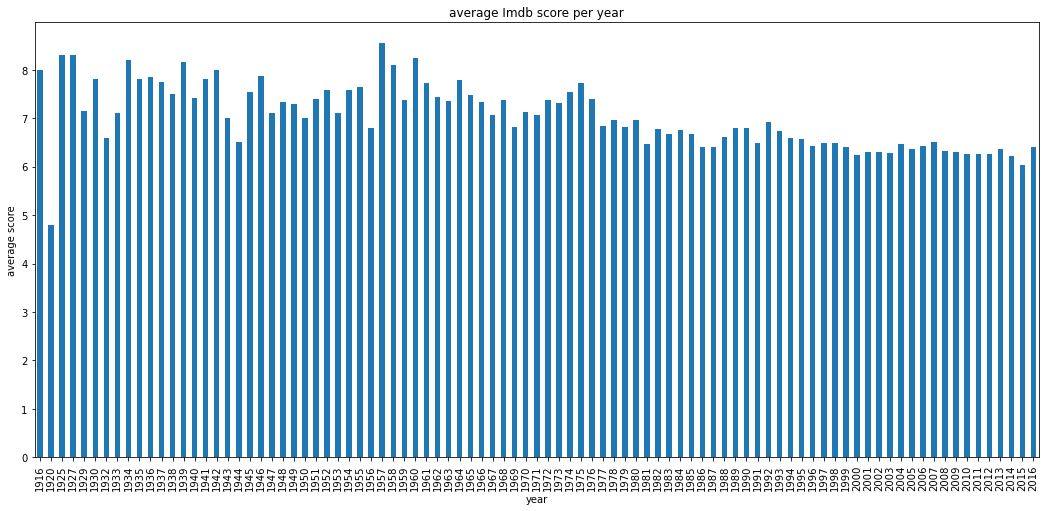

In [32]:
ax = avg_score.plot.bar(figsize= (18, 8), title= 'average Imdb score per year')
ax.set_ylabel('average score')
ax.set_xlabel('year')

Exercise: 
Question 3 - In which year we have the `minimum` and `maximum` spent movie budget?

`hint: use a line chart to visualize your results.` 

In [35]:
movie_budget = data.groupby('title_year')['movie_budget'].sum()

In [40]:
print(f'The year we have the maximum movie budget is : {movie_budget.idxmax()} and the budget is {movie_budget.max()}')
print(f'The year we have the minimum movie budget is : {movie_budget.idxmin()} and the budget is {movie_budget.min()}')

The year we have the maximum movie budget is : 2006 and the budget is 20019582000.0
The year we have the minimum movie budget is : 1920 and the budget is 100000.0


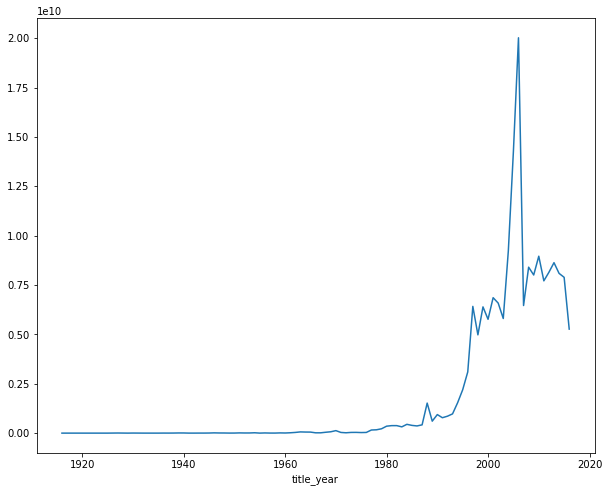

In [39]:
movie_budget.plot(figsize= (10, 8))

Question 4 - Is there any relationship between IMdb score of a movie and the movie income?

To approaches to solve this question:
- Visual Correlation Analysis 
- Generating the Correlation Matirx

In [43]:
data_q4= data[['imdb_score', 'movie_income']]
data_q4

,imdb_score,movie_income
0,7.9,760505847.0
1,7.1,309404152.0
2,6.8,200074175.0
3,8.5,448130642.0
4,7.1,NaN
...,...,...
5038,7.7,NaN
5039,7.5,NaN
5040,6.3,NaN
5041,6.3,10443.0


Let's drop the rows with `non` values

In [44]:
data_q4.dropna(inplace=True)

<ipython-input-44-ebf4093fed9e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_q4.dropna(inplace=True)


In [47]:
#Check
data_q4.isna().any()

imdb_score      False
movie_income    False
dtype: bool

Let's create a scatter plot to see the data

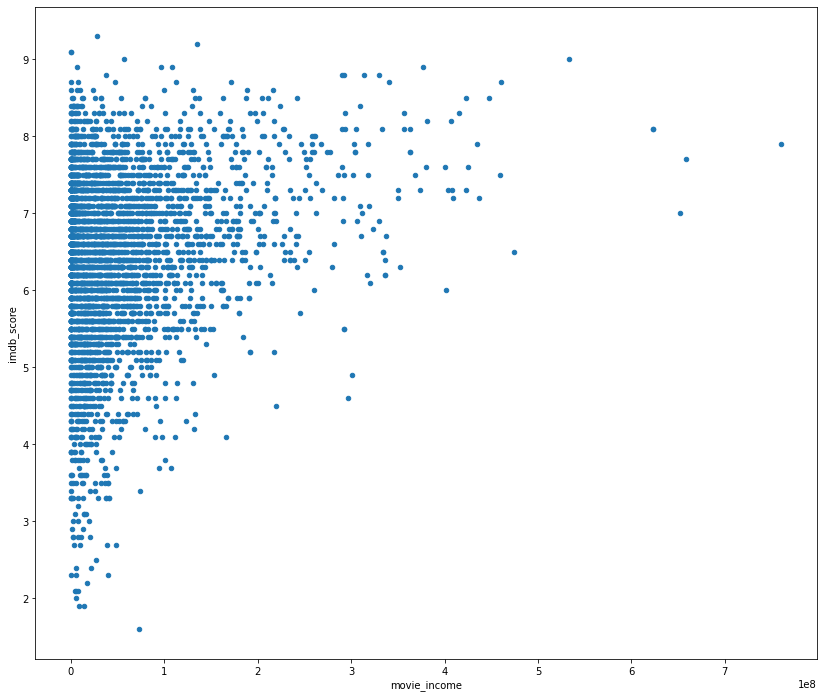

In [51]:
data_q4.plot.scatter(x= 'movie_income', y= 'imdb_score', figsize= (14, 12))

As we can see, Movie income and imdb score has linear relationship as the imdb score increase, movie income also increase

Let's generate the correlation matrix

In [52]:
data_q4.corr()

,imdb_score,movie_income
imdb_score,1.000000,0.198021
movie_income,0.198021,1.000000


we can see the correlation betweem imdb score and income is only 0.19,so the relation between them is not realy strong